# Testing the non-Markovian Path Analysis Package
 

In [1]:
from tools_for_notebook import *
%matplotlib inline

## 2D Toy model

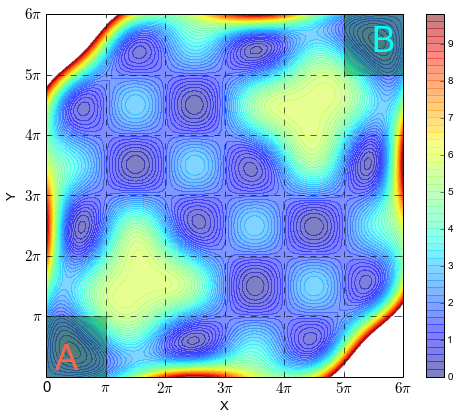

In [2]:
plot_traj([],[])

## MC simulation

In [3]:
#Generating MC trajectories
mc_traj1_2d = mc_simulation2D(100000)
mc_traj2_2d = mc_simulation2D(10000)


## 1 - Ensemble class (analysis of continuos trajectories)

Stores an esemble (list) of trajectories (np.arrays). The ensemble could have any number of trajectories including no trajectories at all.

### Creating an Ensemble

In [4]:
# Empty ensemble with no trajectories
my_ensemble = Ensemble()

From a single trajectory:

In [5]:

# from a single trajectory
my_ensemble = Ensemble(mc_traj1_2d)

From a list of trajectories:

In [6]:
# We have to set list_of_trajs = True

my_list_of_trajs = [mc_traj1_2d, mc_traj2_2d]

my_ensemble = Ensemble(my_list_of_trajs, list_of_trajs = True)

### Ensembles are iterable objects  

In [7]:
for traj in my_ensemble:
    print(len(traj))

100000
10000


### Adding trajectories to the Ensemble
New trajectories can be added to the ensemble as long as there is consistency in the number of variables.

In [8]:
my_ensemble = Ensemble()

my_ensemble.add_trajectory(mc_traj1_2d)

my_ensemble.add_trajectory(mc_traj2_2d)

## "Printing" the ensemble

In [9]:
print(my_ensemble)

Ensemble with 2 (2-dimensional) trajectories 
Total number of snapshots: 110000


### Defining states and computing MFPTs
The states are considered intervals in the is the class is Ensemble

In [10]:
stateA = [[0,pi],[0,pi]]
stateB = [[5*pi,6*pi],[5*pi,6*pi]]

my_ensemble.mfpts(stateA, stateB)

{'mfptAB': 1553.3783783783783,
 'mfptBA': 1309.3243243243244,
 'std_err_mfptAB': 209.11665531840802,
 'std_err_mfptBA': 205.63189523761267}

### Sum of ensembles (ensemble + ensemble)

In [49]:
seq1 = mc_simulation2D(20000)
seq2 = mc_simulation2D(20000)

my_e1 = Ensemble(seq1)
my_e2 = Ensemble(seq2)

ensemble1 = my_e1 + my_e2

#### Another simple example

In [12]:
e1 = Ensemble([1,2,3,4])
e2 = Ensemble([2,3,4,5])
e3 = Ensemble([2,1,1,4])

my_ensembles = [e1, e2, e3]

ensemble_tot = Ensemble([])

for ens in my_ensembles:
    ensemble_tot += ens

#ensemble_tot.mfpts([1,1],[4,4])

### Computing the count matrix and transition matrix

In [13]:
n_states = N**2
C1 = my_ensemble._count_matrix(n_states, mapping_function2D)
print(C1)

[[ 7128.   122.     0. ...,     0.     0.     0.]
 [  133.   678.    65. ...,     0.     0.     0.]
 [    0.    83.  4241. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  3966.    70.     0.]
 [    0.     0.     0. ...,    71.   633.    97.]
 [    0.     0.     0. ...,     0.    94.  5798.]]


In [14]:
K1 = my_ensemble._mle_transition_matrix(n_states, mapping_function2D)
print(K1)

[[ 0.96350365  0.01649094  0.         ...,  0.          0.          0.        ]
 [ 0.14285714  0.72824919  0.0698174  ...,  0.          0.          0.        ]
 [ 0.          0.01719495  0.87859954 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.86499455  0.01526718  0.        ]
 [ 0.          0.          0.         ...,  0.08452381  0.75357143
   0.11547619]
 [ 0.          0.          0.         ...,  0.          0.01566928
   0.96649442]]


## 2 - PathEnsemble class

### Creating a path ensemble object

In [51]:
#p_ensemble = PathEnsemble()

#### From ensemble

In [16]:
p_ensemble = PathEnsemble.from_ensemble(my_ensemble, stateA, stateB)

print(p_ensemble)

PathEnsemble with 37 (2-dimensional) trajectories 
Total number of snapshots: 57512


### MFPTs

In [17]:
p_ensemble.mfpts(stateA, stateB)

{'mfptAB': 1553.3783783783783,
 'mfptBA': 'NaN',
 'std_err_mfptAB': 209.11665531840802,
 'std_err_mfptBA': 'NaN'}

### Count matrix

In [18]:
print(p_ensemble._count_matrix(n_states, mapping_function2D))


[[ 6632.   116.     0. ...,     0.     0.     0.]
 [  112.   514.    42. ...,     0.     0.     0.]
 [    0.    40.  2409. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  2061.    40.     0.]
 [    0.     0.     0. ...,    26.   160.    19.]
 [    0.     0.     0. ...,     0.     0.     0.]]


In [19]:
#clusters = p_ensemble.cluster(distance_metric = 'RMSD', n_cluster=10, method = 'K-means')


## 3 - DiscreteEnsemble class

We can generate a discrete trajectory from the same mapping function and we should obtain exaclty the same result:

In [20]:
d_ens = DiscreteEnsemble.from_ensemble(my_ensemble, mapping_function2D)

print(d_ens)

DiscreteEnsemble with 2 (1-dimensional) trajectories 
Total number of snapshots: 110000


### Count matrix and transition matrix

In [21]:
C2 = d_ens._count_matrix(n_states)
print(C2)

[[ 7128.   122.     0. ...,     0.     0.     0.]
 [  133.   678.    65. ...,     0.     0.     0.]
 [    0.    83.  4241. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  3966.    70.     0.]
 [    0.     0.     0. ...,    71.   633.    97.]
 [    0.     0.     0. ...,     0.    94.  5798.]]


In [22]:
K2= d_ens._mle_transition_matrix(n_states)
print(K2)

[[ 0.96350365  0.01649094  0.         ...,  0.          0.          0.        ]
 [ 0.14285714  0.72824919  0.0698174  ...,  0.          0.          0.        ]
 [ 0.          0.01719495  0.87859954 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.86499455  0.01526718  0.        ]
 [ 0.          0.          0.         ...,  0.08452381  0.75357143
   0.11547619]
 [ 0.          0.          0.         ...,  0.          0.01566928
   0.96649442]]


### Defining states and computing MFPTs
The states are now considered sets, defining the states as follow we should obtain the same results

In [23]:
stateA = [0]
stateB = [N*N-1]

d_ens.mfpts(stateA, stateB)

{'mfptAB': 1553.3783783783783,
 'mfptBA': 1309.3243243243244,
 'std_err_mfptAB': 209.11665531840802,
 'std_err_mfptBA': 205.63189523761267}

### Generating a Discrete Ensemble from the transition matrix

In [24]:
d_ens2 = DiscreteEnsemble.from_transition_matrix(K2, sim_length = 100000)

In [25]:
#d_ens2.mfpts(stateA,stateB)

## 4 - DiscretePathEnsemble class

### Creating the DPE

#### From Ensemble

In [26]:
dpathEnsemble = DiscretePathEnsemble.from_ensemble(my_ensemble, stateA, stateB, mapping_function2D)
print(dpathEnsemble)

DiscretePathEnsemble with 37 (1-dimensional) trajectories 
Total number of snapshots: 57512


In [27]:
#MFPT from the transition matrix
dpathEnsemble.nm_mfpt(stateA, stateB, ini_probs = None, n_states = N*N)

1553.3783783784093

#### From the transition matrix 

In [42]:
n_paths = 100

dpathEnsemble = DiscretePathEnsemble.from_transition_matrix\
                (K2, stateA = stateA, stateB = stateB, n_paths = 100,ini_pops = [1])
    
print(dpathEnsemble)

DiscretePathEnsemble with 100 (1-dimensional) trajectories 
Total number of snapshots: 137612


### Fundamental sequence

In [43]:
FSs = dpathEnsemble.fundamental_sequences(K2)
size = len(FSs)

paths = dpathEnsemble.trajectories

_

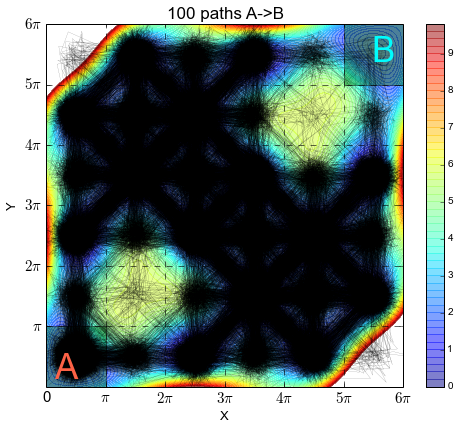

In [44]:
discrete = [True for i in range(size)]

plot_traj([[paths[i],[]] for i in range(size)] , discrete, \
          line_width=0.1, std=0.5, color='k', title = '{} paths A->B'.format(n_paths))

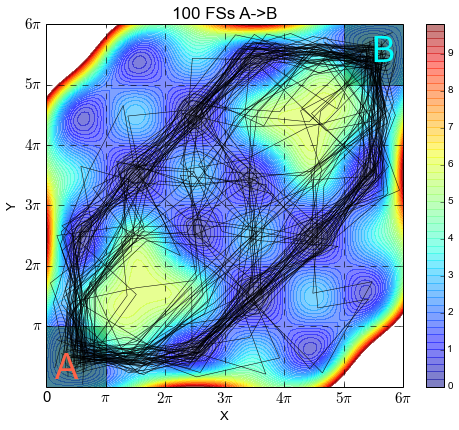

In [45]:
plot_traj([[FSs[i],[]] for i in range(size)] ,discrete, \
          line_width=0.5, std=0.5, color='k', title = '{} FSs A->B'.format(n_paths))

In [46]:
reduced_FSs, weights = dpathEnsemble.weighted_fundamental_sequences(K2)
new_size = len(weights)
lw = [weights[i]*100 for i in range(new_size)] 

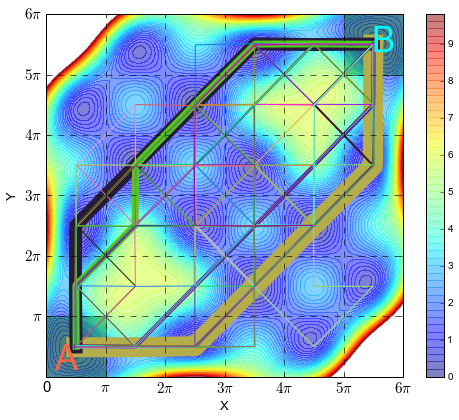

In [48]:
plot_traj([[reduced_FSs[i],[]] for i in range(new_size)] ,discrete=[True for i in range(new_size)],\
          line_width = lw,std = 0.02) 

In [34]:
### for i,w in enumerate(weights):
#     print(w,' ',reduced_FSs[i])

In [35]:
# G = nx.DiGraph()
# G.add_nodes_from(list(range(N*N)))
# max_path = 2
# count = 0
# for path in reduced_FSs:
#     for i in range(len(path)-1):
#         G.add_edge(path[i],path[i+1], weight = 0)
#     count+=1
#     if count >= max_path: break
# nx.draw_random(G,with_labels=True)